In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
# %matplotlib widget
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
g = pd.read_csv('onlyvalues.csv')

In [3]:
g.columns

Index(['nr_crt', 'sample_number', 'solvent', 'temperature', 'time_h',
       'fraction', 'extract', 'total_glucans', 'alpha_glucans',
       'beta_glucans'],
      dtype='object')

In [4]:
gm = g.melt(id_vars=['nr_crt', 'sample_number',
                     'solvent', 'temperature', 'time_h',
                     'fraction'],
            value_vars=['extract', 'total_glucans',
                        'alpha_glucans', 'beta_glucans'],
            var_name='parameter',
            value_name='value')

In [5]:
gmabt = gm.loc[(gm['fraction']=='total')
            & (gm['parameter']!='extract')
            & (gm['parameter']!='total_glucans')]

In [17]:
gt = g.loc[g['fraction']=='total']

In [7]:
# sns.catplot(data = gmabt,
#             x='solvent', y='value',
#         hue='parameter',
#             row='time_h', col='temperature',
#             sharey=True,
#             kind='bar')

In [35]:
pd.Categorical(gmabt.solvent).codes

array([3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
      dtype=int8)

In [54]:
pd.Categorical(gmabt.parameter).codes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int8)

In [60]:
pd.Categorical(gmabt.solvent).codes

array([3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
      dtype=int8)

In [61]:
gt.solvent.values

array(['water', 'water', 'ethanol_25', 'ethanol_25', 'ethanol_50',
       'ethanol_50', 'ethanol_75', 'ethanol_75', 'water', 'water',
       'water', 'water', 'ethanol_75', 'ethanol_75', 'ethanol_75',
       'ethanol_75', 'water', 'water', 'water', 'water', 'water', 'water'],
      dtype=object)

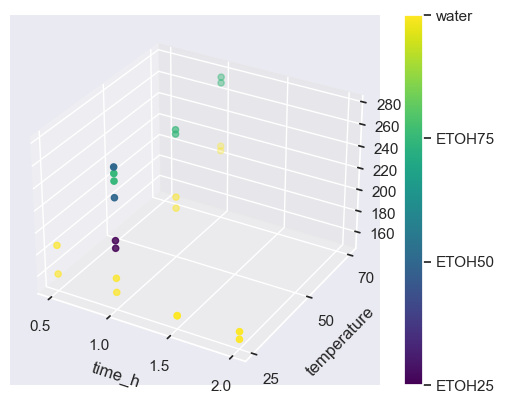

In [78]:
sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = gt.time_h
y = gt.temperature
z = gt.beta_glucans

# ax.axes.set_yticks(solvent_dummy[range(4)])

ax.set_xlabel(x.name)
ax.set_ylabel(y.name)
ax.set_zlabel(z.name)

ax.set_xticks(x.unique())
ax.set_yticks(y.unique())

p = ax.scatter(x, y, z, c = pd.Categorical(gt.solvent).codes, cmap='viridis')

color_bar = fig.colorbar(p, ax=ax)
color_bar.set_ticks([0,1,2,3])
color_bar.set_ticklabels(['ETOH25', 'ETOH50', 'ETOH75', 'water'])
# plt.savefig('extract.svg')
plt.show()

In [15]:
# sns.pairplot(data=g.loc['solvent':], kind='reg')

<Axes: xlabel='time_h', ylabel='value'>

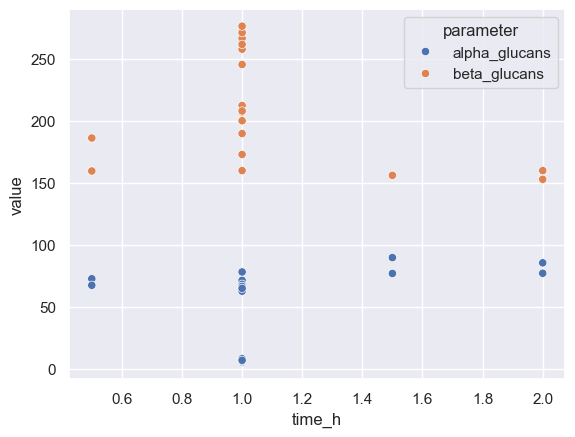

In [66]:
sns.scatterplot(gmabt, x='time_h', y='value', hue = 'parameter')